## **Práctica 9: Clustering Jerárquico y Particional**

Nombre: Recinos Hernández Luis Mario y Alcántara Guerrero Guadalupe Alfredo

No. Cuenta: 317244331 y 317218543

Email: lmrecinoshr@gmail.com y alfredoguadalupe.alcantara@gmail.com

**Contexto**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer)

**Objetivo.** Obtener grupos de pacientes con características similares, diagnosticadas con un tumor de mama, a través de clustering jerárquico y particional.

**Fuente de datos:**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

- ID number: Identifica al paciente -Discreto-
- Diagnosis: Diagnostico (M=maligno, B=benigno) -Booleano-
- Radius: Media de las distancias del centro y puntos del perímetro -Continuo-
- Texture: Desviación estándar de la escala de grises -Continuo-
- Perimeter: Valor del perímetro del cáncer de mama -Continuo-
- Area: Valor del área del cáncer de mama -Continuo-
- Smoothness: Variación de la longitud del radio -Continuo-
- Compactness: Perímetro ^ 2 /Area - 1 -Continuo-
- Concavity: Caída o gravedad de las curvas de nivel -Continuo-
- Concave points: Número de sectores de contorno cóncavo -Continuo-
- Symmetry: Simetría de la imagen -Continuo-
- Fractal dimension: “Aproximación de frontera” - 1 -Continuo-

#### **1) Importar las bibliotecas necesarias y los datos**

In [30]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [31]:
BCancer = pd.read_csv('WDBCOriginal.csv')
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [32]:
BCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDNumber          569 non-null    object 
 1   Diagnosis         569 non-null    object 
 2   Radius            569 non-null    float64
 3   Texture           569 non-null    float64
 4   Perimeter         569 non-null    float64
 5   Area              569 non-null    float64
 6   Smoothness        569 non-null    float64
 7   Compactness       569 non-null    float64
 8   Concavity         569 non-null    float64
 9   ConcavePoints     569 non-null    float64
 10  Symmetry          569 non-null    float64
 11  FractalDimension  569 non-null    float64
dtypes: float64(10), object(2)
memory usage: 53.5+ KB


In [33]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


#### **2) Selección de características**

 **Evaluación visual**

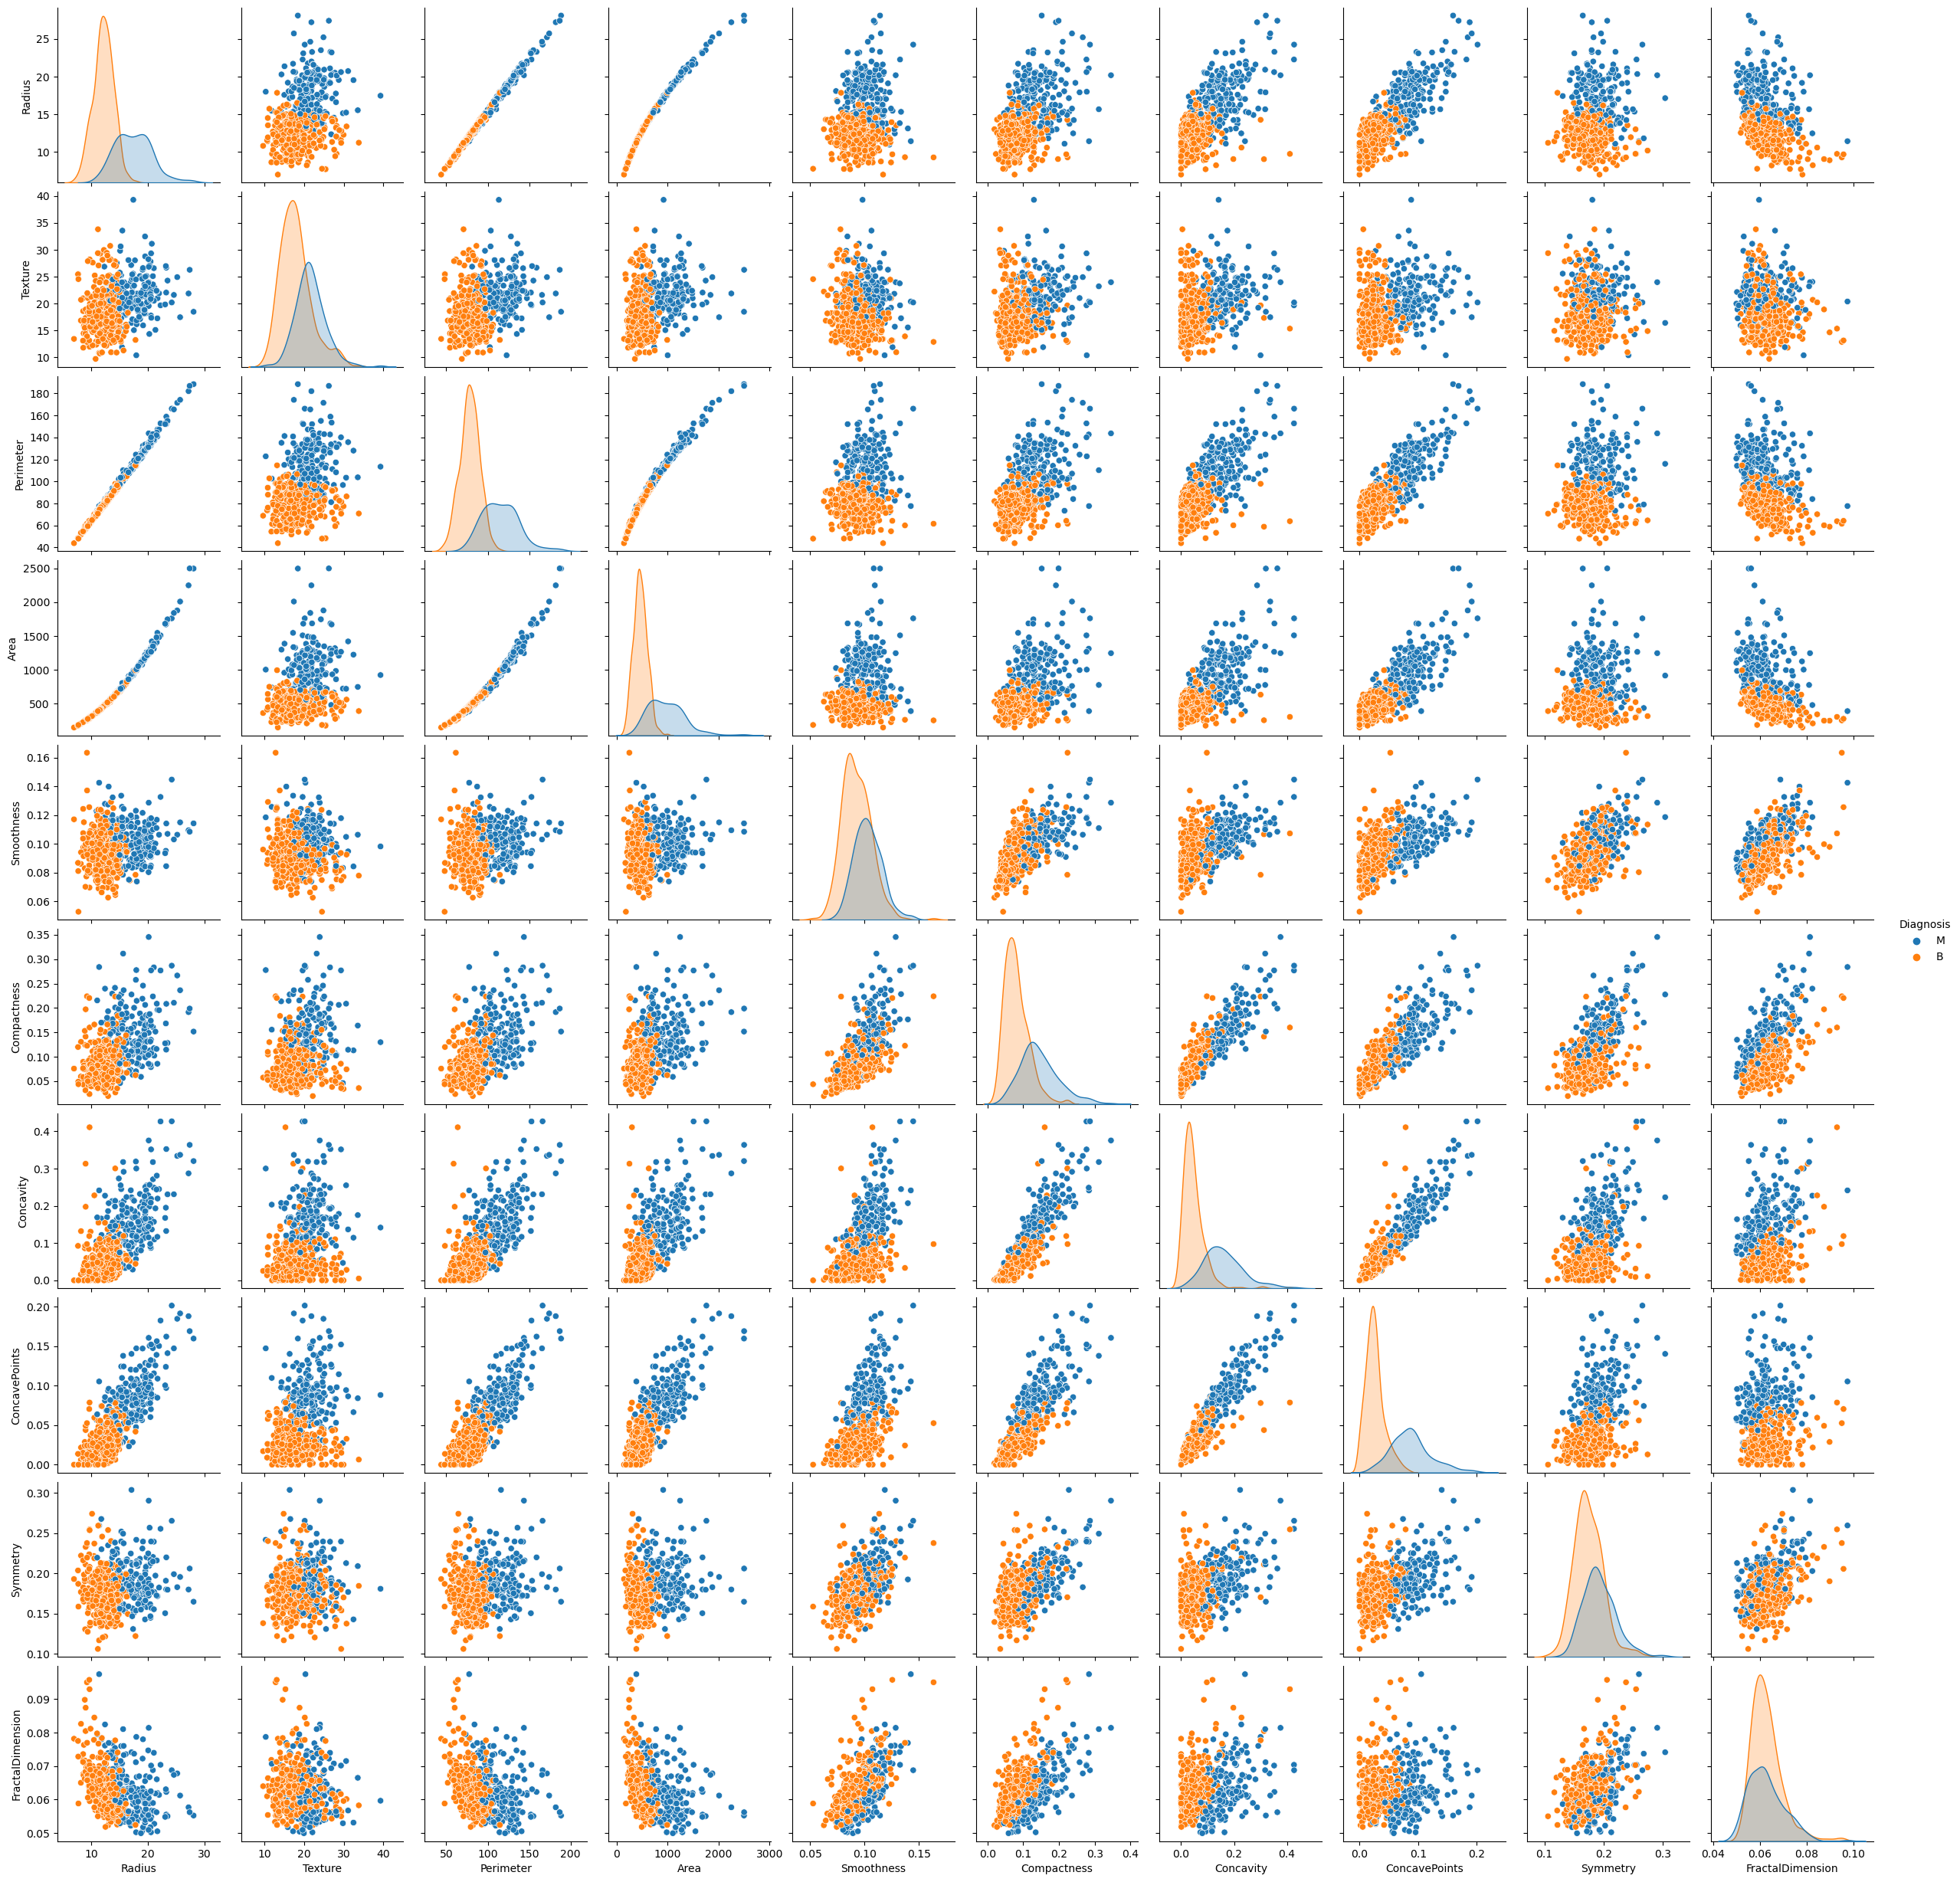

In [34]:
sns.pairplot(BCancer, hue='Diagnosis')
plt.show()

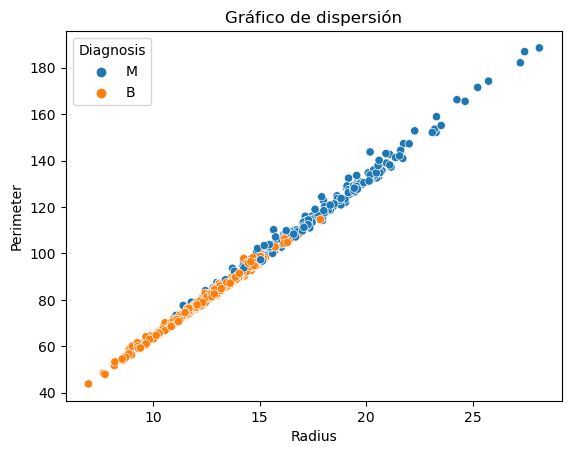

In [35]:
sns.scatterplot(x='Radius', y ='Perimeter', data=BCancer, hue='Diagnosis')
plt.title('Gráfico de dispersión')
plt.xlabel('Radius')
plt.ylabel('Perimeter')
plt.show()

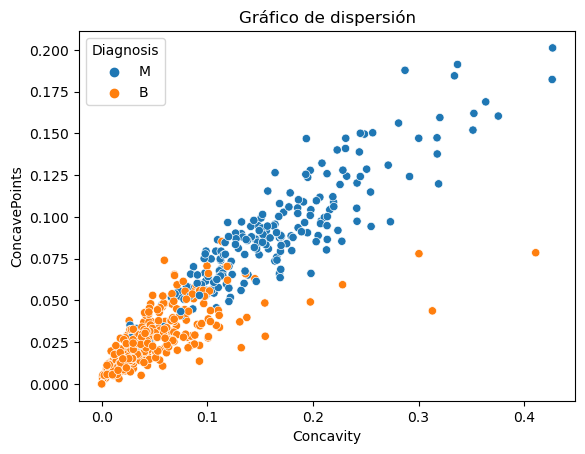

In [27]:
sns.scatterplot(x='Concavity', y ='ConcavePoints', data=BCancer, hue='Diagnosis')
plt.title('Gráfico de dispersión')
plt.xlabel('Concavity')
plt.ylabel('ConcavePoints')
plt.show()

**Se genera una matriz de correlación**
Esto por medio de la asignación de una variable de correlación con los datos presentes en el archivo de datos.

In [40]:
CorrBCancer = BCancer.corr(method='pearson')
CorrBCancer

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


**Generación de la matriz de correlación con base a la variable generada**
Considerar que la imperión de estos valores se hizo para el atributo de radio de entre los datos del hospital, con la sentencia "[: 10]" demandamos la impresión de solo los primeros 10 elementos de los datos consultados.

In [41]:
print(CorrBCancer['Radius'].sort_values(ascending=False)[:10], '\n')

Radius              1.000000
Perimeter           0.997855
Area                0.987357
ConcavePoints       0.822529
Concavity           0.676764
Compactness         0.506124
Texture             0.323782
Smoothness          0.170581
Symmetry            0.147741
FractalDimension   -0.311631
Name: Radius, dtype: float64 



**Generación de mapa de calor**
Con la siguiente tabla, podemos presentar de manera gráfica las relaciones que existen entre los difenrtes grupos de datos dentro del archivo de datos. Entre mayor sea la interrelacióm entre los mismos, más oscuro será la coloración que los represente en el mapa. 
El mapa de calor es instanicado mediante la función "heatmap", que nos permite alimentar al gráfico con la  información que nosotros necesitemos.

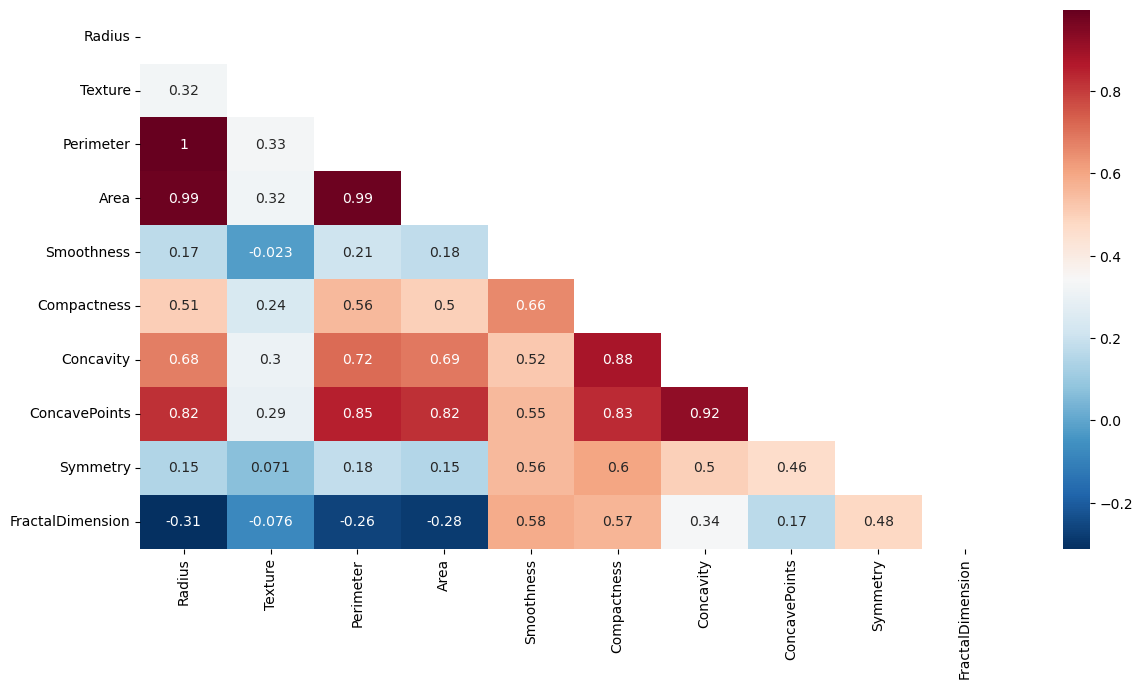

In [43]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrBCancer)
sns.heatmap(CorrBCancer, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Se comienza con la selección de variables para análisis**
Este procedimiento se relaiza mediante la generacón de una matriz con aquellas varbales de datos que nos sean de interés para llevar a cabo el análisis. En este caso, se utilizarán algunos de los datos mostrados enel reusltado de la línea "print(CorrBCancer['Radius'].sort_values(ascending=False)[:10], '\n')" 

In [45]:
MatrizVariables = np.array(BCancer[['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension']])
pd.DataFrame(MatrizVariables)

,0,1,2,3,4,5
0,10.38,1001.0,0.11840,0.27760,0.2419,0.07871
1,17.77,1326.0,0.08474,0.07864,0.1812,0.05667
2,21.25,1203.0,0.10960,0.15990,0.2069,0.05999
3,20.38,386.1,0.14250,0.28390,0.2597,0.09744
4,14.34,1297.0,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.1726,0.05623
565,28.25,1261.0,0.09780,0.10340,0.1752,0.05533
566,28.08,858.1,0.08455,0.10230,0.1590,0.05648
567,29.33,1265.0,0.11780,0.27700,0.2397,0.07016


**Estandarización de datos**
En aras de prevenir que algunos datos tomen mayor peso que otros por factoes externos a nuestro análisis, lelvamos a cabo una estandarización de datos usando funciones ya integradas en la libreta de trabajo 

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
estandarizar = StandardScaler()
MEstandarizada = estandarizar.fit_transform(MatrizVariables)
pd.DataFrame(MEstandarizada)

,0,1,2,3,4,5
0,-2.073335,0.984375,1.568466,3.283515,2.217515,2.255747
1,-0.353632,1.908708,-0.826962,-0.487072,0.001392,-0.868652
2,0.456187,1.558884,0.942210,1.052926,0.939685,-0.398008
3,0.253732,-0.764464,3.283553,3.402909,2.867383,4.910919
4,-1.151816,1.826229,0.280372,0.539340,-0.009560,-0.562450
...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,-0.312589,-0.931027
565,2.085134,1.723842,0.102458,-0.017833,-0.217664,-1.058611
566,2.045574,0.577953,-0.840484,-0.038680,-0.809117,-0.895587
567,2.336457,1.735218,1.525767,3.272144,2.137194,1.043695


##**Inicio de procesamiento para el Clustering Jerárquico**\n
Un proceso que solo podemos iniciar cuando:
- Tenemos una fuennte de información confiable (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
- Tenemos un grupo de datos coherentes (Conclusiones que podemos sacar del procesamiento de datos realizado antes de esta etapa en esta misma libreta)
- Sabemos qué datos serán los protagonistas en nuestro estudio 
- Hemos generado una matriz de datos clave que contenga a las variables relevantes para nuestro estudio
\n\n

La generación de clusters de datos representa en materia de inteligencia artificial la capacidad de alienar ciertos grupos de datos y relaciones de entre un conjutno total de datos trnasaccionales y así poder orientar nuestro estudio a un sector en específico en un tema. En los métodos de procesamiento presentados a continuación, orientaremos el estudio de los datos del hospital a identificar pacientes con caracteristicas similares y así poder identificar que síntomas se relacionan más con ciertas enfermedades detectadas por el personal médico.\n


## Cluster Jerárquico

En primera, instancia, el trabajo con clusters requiere de la importación de ciertas bibliotecas: 

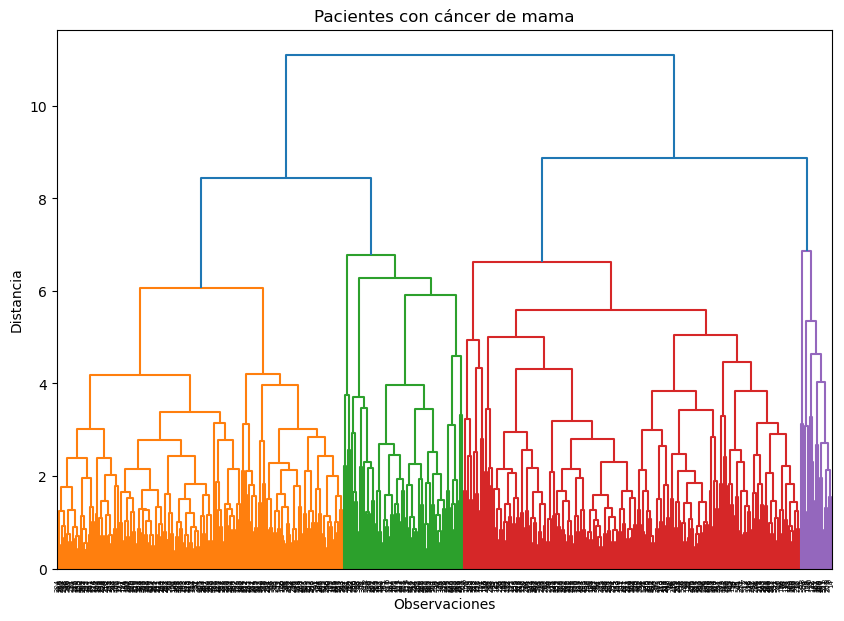

In [47]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10, 7))
plt.title("Pacientes con cáncer de mama")
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
Arbol = shc.dendrogram(shc.linkage(MEstandarizada, method='complete', metric='euclidean'))

Para facilitar su manejo, podemos asignar etiquetas a todos los datos obtenidos, esto ser realiza de la siguiente manera:

In [49]:
MJerarquico = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean')
MJerarquico.fit_predict(MEstandarizada)
MJerarquico.labels_

array([0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 3, 2, 1, 3, 0, 2, 3, 2, 1, 2, 2, 2,
       0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 2, 1, 2,
       2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 0, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 2, 0, 2, 3, 3, 3, 1, 2, 1, 2, 2,
       2, 2, 1, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 1, 3, 3, 2, 1, 2, 3, 1, 3, 3, 1, 1, 2, 2, 3, 2, 2, 3, 3,
       2, 2, 3, 3, 1, 0, 1, 3, 3, 3, 1, 2, 2, 3, 0, 3, 3, 2, 2, 3, 2, 1,
       1, 2, 2, 1, 1, 0, 3, 3, 2, 1, 2, 3, 1, 3, 1, 1, 2, 2, 3, 3, 2, 1,
       3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 1, 3, 3, 1, 1, 3, 1, 2, 3,
       2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 1, 1, 1, 2, 1, 0, 0, 1, 1, 3, 2, 3,
       2, 1, 3, 3, 2, 2, 3, 2, 1, 3, 3, 2, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3,
       3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 1,

In [50]:
BCancer['clusterH'] = MJerarquico.labels_
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,3
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0


In [51]:
BCancer[BCancer.clusterH == 0]

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH
0,P-842302,M,17.990,10.38,122.80,1001.0,0.1184,0.2776,0.30010,0.14710,0.2419,0.07871,0
3,P-84348301,M,11.420,20.38,77.58,386.1,0.1425,0.2839,0.24140,0.10520,0.2597,0.09744,0
8,P-844981,M,13.000,21.82,87.50,519.8,0.1273,0.1932,0.18590,0.09353,0.2350,0.07389,0
9,P-84501001,M,12.460,24.04,83.97,475.9,0.1186,0.2396,0.22730,0.08543,0.2030,0.08243,0
14,P-84667401,M,13.730,22.61,93.60,578.3,0.1131,0.2293,0.21280,0.08025,0.2069,0.07682,0
22,P-8511133,M,15.340,14.26,102.50,704.4,0.1073,0.2135,0.20770,0.09756,0.2521,0.07032,0
25,P-852631,M,17.140,16.40,116.00,912.7,0.1186,0.2276,0.22290,0.14010,0.3040,0.07413,0
78,P-8610862,M,20.180,23.97,143.70,1245.0,0.1286,0.3454,0.37540,0.16040,0.2906,0.08142,0
108,P-86355,M,22.270,19.67,152.80,1509.0,0.1326,0.2768,0.42640,0.18230,0.2556,0.07039,0
122,P-865423,M,24.250,20.20,166.20,1761.0,0.1447,0.2867,0.42680,0.20120,0.2655,0.06877,0


**Obtención de Centrodides**
Con los datos debidamente procesados para su fácil manejo, podemos comenzar con la identificación de centrodides de entre todo el volumen de información

In [54]:
CentroidesH = BCancer.groupby(['clusterH'])['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension'].mean()
CentroidesH

/var/folders/bt/fvlp_xd11ln3739bnzlm_j2w0000gn/T/ipykernel_5928/352068534.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CentroidesH = BCancer.groupby(['clusterH'])['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension'].mean()


,Texture,Area,Smoothness,Compactness,Symmetry,FractalDimension
clusterH,,,,,,
0,20.133478,775.543478,0.124274,0.242200,0.240830,0.077839
1,22.540568,1243.728409,0.098441,0.137140,0.182560,0.058889
2,18.167540,561.336694,0.103316,0.114235,0.190486,0.065737
3,19.160095,505.403810,0.084217,0.063813,0.163030,0.059317


**Interpretación**

Una vez obetenidos estos diferentes clusters, deberemos de ser capaces de interpretarlos para identificar las mécinas y modelos que conforman a la naturaleza de los datos obtenidos

- **Clúster 1**
Se alcanzan a ver 88 pacientes con algunos indicios de cancer, todas estas personas presentaron signos temrpanos similares, con una textura de 22 pixeles, presentaron un tumor relatiamente grande con un área de 1243 pixeles (el mayor tamaño de todos los clusters obtenidos de los datos del hospital). Así mismo, tuvieron una suavidad que apenas y alcanza por una centésima a los 0.1 pixeles. Los valores de compactado fueron de 0.13714 y una dimensión fractal promedio de 0.05.


- **Clúster 2**
El segundo cluster, conformado por 248 pacientes presento una texura de 18.167 pixeles, acompañando a un pequeño tamaño de 561.33 pixeles, la suavidad de los siíntomas de los pacientes fue de 0.1 que a su vez tenia 0.11 pixeles de compactado. Así mismo, los pacientes mantuvieron una simetría del 0.19 y, por último, un promedio de dimensión fractal de 0.056


- **Clúster 3**
Finalmente, los 210 pacientes agrupados en el tercer cluster demostraron tener el menor tamaño de tumores de entre todos los datos de los pacientes del hospital con 505.40 pixeles, las texturas y suavidad de los mismos fueron de 19.16 y 0.08 respectivamente. Los datos para el compactado de los tumores fue de 0.063 pixeles. Por útlimo, se tuvo una simetría de 0.16 pixeles y un promedio de dimensión fractal de 0.059

- **Clúster 0**
Conformado por 23 pacientes con indicios de cáncer maligno por el tamaño del tumor, con un área promedio de tumor de 775 pixeles y una desviación estándar de textura de 20 pixeles. Aparentemente es un tumor compacto (0.24 pixeles), cuya suavidad alcanza 0.12 pixeles, una simetría de 0.24 y una aproximación de frontera, dimensión fractal, promedio de 0.077 pixeles.



Parte de la información recabada en esta etapa del proceso salió de la impresión de la cantidad de elementos:

In [53]:
BCancer.groupby(['clusterH'])['clusterH'].count()

clusterH
0     23
1     88
2    248
3    210
Name: clusterH, dtype: int64

Gráficamente, la información recabada de los útimos clusters se podrá representar de la siguiente forma:

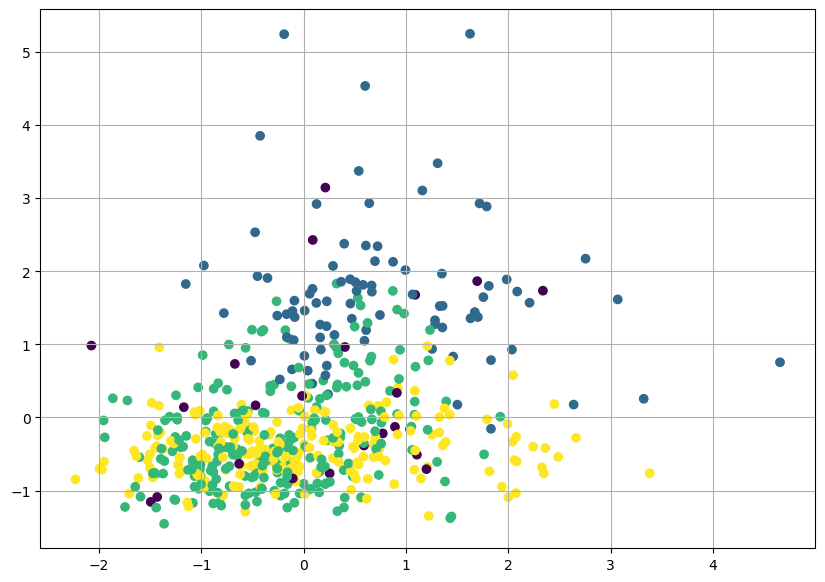

In [56]:
plt.figure(figsize=(10, 7))
plt.scatter(MEstandarizada[:,0], MEstandarizada[:,1], c=MJerarquico.labels_)
plt.grid()
plt.show()


## Cluster Particional (Con el algoritmo K-means)

Como en cualquier metodología para la generación y análisis de clusters, debemos de importar algunas bibliotecas especializadas:

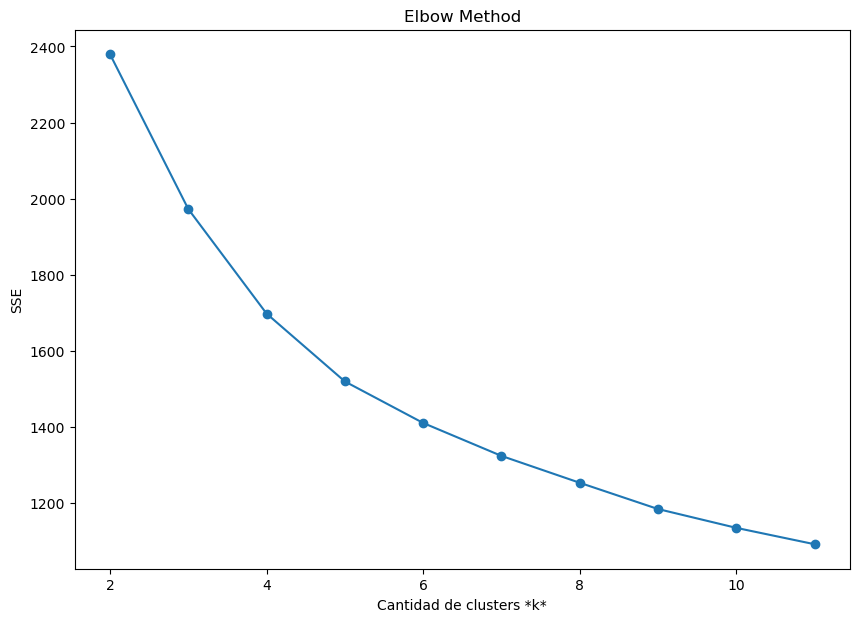

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

SSE = []
for i in range(2, 12):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(MEstandarizada)
    SSE.append(km.inertia_)
    
plt.figure(figsize=(10, 7))
plt.plot(range(2, 12), SSE, marker='o')
plt.xlabel('Cantidad de clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [60]:
!pip install kneed

In [61]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 12), SSE, curve="convex", direction="decreasing")
kl.elbow

5

EL 5 mostrado como la salida de la línea de código pasada representa un "Knee point" que nos marca el punto exacto donde la gráfica de los datos se quiebra de manera más drástica. El punto 5 en el plano nos representa en este caso, donde se origina esta rodilla con la que asociamos este tipo de procesamiento de datos.

Una vez mas, nos generamos etiquetas para nuestros datos:

In [62]:
MParticional = KMeans(n_clusters=5, random_state=0).fit(MEstandarizada)
MParticional.predict(MEstandarizada)
MParticional.labels_

array([1, 4, 4, 1, 4, 1, 4, 1, 1, 1, 0, 3, 1, 0, 1, 1, 2, 1, 4, 2, 3, 3,
       1, 4, 4, 1, 1, 4, 4, 3, 4, 1, 1, 4, 3, 4, 3, 2, 0, 3, 0, 3, 4, 3,
       0, 4, 2, 3, 2, 0, 0, 2, 2, 4, 0, 2, 4, 3, 2, 3, 3, 3, 1, 3, 3, 3,
       3, 2, 3, 2, 4, 3, 4, 3, 2, 2, 3, 1, 1, 2, 3, 3, 4, 4, 3, 4, 0, 4,
       0, 3, 0, 0, 2, 2, 3, 4, 3, 2, 2, 3, 0, 3, 2, 3, 3, 1, 3, 2, 1, 0,
       3, 3, 3, 3, 3, 0, 3, 3, 1, 4, 2, 4, 1, 3, 2, 2, 0, 4, 3, 4, 3, 3,
       4, 2, 4, 0, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 1, 2, 2, 2, 3, 3, 1, 2,
       2, 2, 4, 2, 2, 2, 3, 4, 4, 3, 4, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2,
       3, 4, 0, 2, 4, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 3, 3, 2, 3, 0,
       4, 3, 3, 4, 4, 1, 3, 2, 3, 4, 3, 2, 4, 2, 4, 0, 3, 3, 3, 2, 4, 0,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 1, 3, 0, 0, 4, 2, 0, 4, 4, 0, 0, 2, 2,
       3, 0, 4, 3, 2, 2, 0, 3, 4, 2, 4, 4, 4, 3, 4, 1, 1, 4, 4, 0, 4, 2,
       4, 4, 3, 0, 2, 3, 2, 2, 4, 2, 0, 3, 2, 2, 2, 2, 4, 2, 4, 3, 2, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 0, 4,

In [63]:
BCancer['clusterP'] = MParticional.labels_
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH,clusterP
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0,1
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1,4
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1,4
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0,1
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1,4
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1,4
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,3,0
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0,1


Se puede obsrvar que la columna "ClusterP" corresponde al numero de clusters totales dentro de los datos recopilados, la comparación se puede ver con la siguiente linea de código:

In [65]:
BCancer.groupby(['clusterP'])['clusterP'].count()

clusterP
0     85
1     48
2    184
3    153
4     99
Name: clusterP, dtype: int64

In [66]:
BCancer[BCancer.clusterP == 0]

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH,clusterP
10,P-845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,3,0
13,P-846381,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,3,0
38,P-855133,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,3,0
40,P-855167,M,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,3,0
44,P-85638502,M,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,P-925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,3,0
560,P-925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,1,0
561,P-925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,3,0
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,3,0


In [69]:
CentroidesP = BCancer.groupby(['clusterP'])['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension'].mean()
CentroidesP

/var/folders/bt/fvlp_xd11ln3739bnzlm_j2w0000gn/T/ipykernel_5928/2465084932.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CentroidesP = BCancer.groupby(['clusterP'])['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension'].mean()


,Texture,Area,Smoothness,Compactness,Symmetry,FractalDimension
clusterP,,,,,,
0,24.492706,559.569412,0.085045,0.074626,0.164491,0.059430
1,20.746875,738.941667,0.117829,0.211744,0.229617,0.075797
2,16.339891,511.619022,0.086801,0.063990,0.165405,0.059257
3,17.822680,480.716993,0.105121,0.112265,0.190299,0.067212
4,21.865354,1231.431313,0.099894,0.140528,0.187147,0.059145


**Interpretación**

Una vez mas, tras la obtención de los diferentes clusters de este conjunto de datos podremos dar pie al analisis de los mismos para juzgar los patrones descirtos entre la información del hospital.


- **Clúster 1**
Se alcanzan a ver 100 pacientes con algunos indicios de cancer, todas estas personas presentaron signos tempranos similares, con una textura de 16 pixeles, presentaron un tumor relativamente grande con un área de 1228 pixeles (el mayor tamaño de todos los clusters obtenidos de los datos del hospital). Así mismo, tuvieron una suavidad que apenas y alcanza por dos centésimas a los 0.1 pixeles. Los valores de compactado fueron de 0.1406 y una dimensión fractal promedio de 0.05.


- **Clúster 2**
El segundo cluster, conformado por 56 pacientes presentó una texura de 20.36 pixeles, acompañando a un tamaño de 705 pixeles, la suavidad de los síntomas de los pacientes fue de 0.11 que a su vez tenia 0.2 pixeles de compactado. Así mismo, los pacientes mantuvieron una simetría del 0.22 y, por último, un promedio de dimensión fractal de 0.07


- **Clúster 3**
Finalmente, los 156 pacientes agrupados en el tercer cluster demostraron tener el menor tamaño de tumores de entre todos los datos de los pacientes del hospital con 476.33 pixeles, las texturas y suavidad de los mismos fueron de 17.73 y 0.104 respectivamente. Los datos para el compactado de los tumores fue de 0.107 pixeles. Por útlimo, se tuvo una simetría de 0.16 pixeles y un promedio de dimensión fractal de 0.066


- **Clúster 4**
Es un grupo formado por 85 pacientes con un menor tamaño de tumor (potencialmente benigno), con un área promedio de tumor de 559 pixeles y una desviación estándar de textura de 24 pixeles. Es un tumor compacto (0.07 pixeles), cuya suavidad alcanza 0.08 pixeles, una simetría de 0.16 y una aproximación de frontera, dimensión fractal, promedio de 0.059 pixeles.


- **Clúster 0**
Conformado por 172 pacientes con alta probabilidad de tener un tumor benigno (por su tamaño), con un área promedio de tumor de 514 píxeles y una desviación estándar de textura de 16 píxeles. Aparentemente es un tumor compacto (0.06 píxeles), cuya suavidad alcanza 0.08 píxeles, una simetría de 0.16 y una aproximación de frontera, dimensión fractal, promedio de 0.059 píxeles.

Las conclusiones observadas aquí de igual forma fueron sustentadas por la impresión de la cantidad de clusters que existían en los datos analizados, esta se muestra en la siguiente línea.:


In [70]:
BCancer.groupby(['clusterP'])['clusterP'].count()

clusterP
0     85
1     48
2    184
3    153
4     99
Name: clusterP, dtype: int64

/var/folders/bt/fvlp_xd11ln3739bnzlm_j2w0000gn/T/ipykernel_5928/1494809793.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


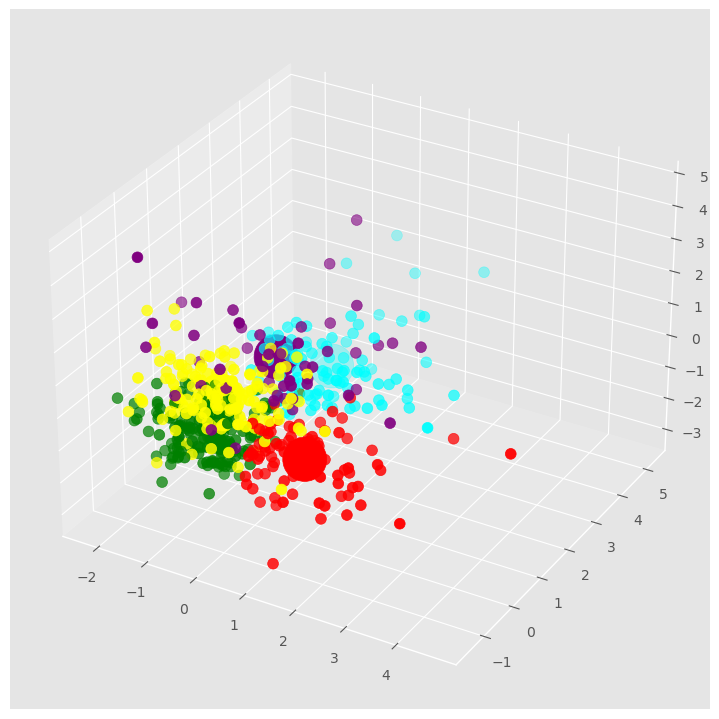

In [72]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
colores=['red', 'purple', 'green', 'yellow', 'cyan']
asignar=[]
for row in MParticional.labels_:
    asignar.append(colores[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(MEstandarizada[:, 0],
           MEstandarizada[:, 1],
           MEstandarizada[:, 2], marker='o', c=asignar, s=60)
ax.scatter(MParticional.cluster_centers_[:, 0],
           MParticional.cluster_centers_[:, 1],
           MParticional.cluster_centers_[:, 2], marker='o', c=colores, s=1000)
plt.show()

## Conclusiones

**Alcántara Guerrero Alfredo Guadalupe**
El objetivo de la práctica se cumplió ya que por medio del uso de los algoritmos de clustering jerárquico y particional pudimos obtener posibles clasificaciones para los pacientes en la base de datos y mediante el análisis de los cluster resultantes identificar cuales grupos podrían potencialmente tener cancer de acuerdo a algunas características del tumor, esta caracteristicas fueron previamente seleccionadas de acuerdo al nivel de correlación entre las variables quitando las que estén altamente relacionadas entre si, para lo cuál tuvimos que realizar previamente la normalización de los datos. Hacer uso del cluster jerárquico y particional sobre los datos de este tipo, ya sea que incluyan diágnostico o no, puede ser de gran ayuda para los medicos para saber el orden de prioridad de los pacientes y atender primero a los que según los cluster generados pueden presentar una alta probabilidad de tener cáncer, debido a que un diágnostico oportuno puede representar salvar la vida del paciente ya que mientras más rápido se detecte el cáncer es más sencillo curarlo.

**Recinos Hernández Luis Mario**
El término de las actividades de la práctica 9 represnetó la comprensión de conceptos como la obtención, separación, abstracción, estandarización y procesado de datos a partir de un gran conjunto de los mismos. Con cada actividad en la práctica nos enfocamos en preparar un conjunto de datos provenientes de un hospital para identificar con ellos las similitudes que existian entre los perfiles de pacientes con indicios de cáncer. La generación de clusters a partir de la similitud de estos prefiles mencionados nos permitieron a nosotras y nosotros, como estudiantes sin conocimientos avanzados en medicina, dicernir entre patrones importantes que nos podrían avisar de la presencia de cáncer en una persona o no.
Gracias a los conocimientos adquiridos en la práctica, me considero capaz de diseccionar datos desde una base para su apropiado procesamiento y analisis, dejándome con la capacidad de extrar información valiosa de datso transaccionales naturalmente producidos en añgún lugar operativo.
